# Spotify Valence Assignment

## Business Analytics Practicum I

---

> Marianna Konstantopoulou <br />
> MSc Business Analytics Part Time <br />

## Questions


### Q1: Expore which Track Features Influence Valence

You will use inferential statistic methods to study how track features influence valence. You must find the best possible model for explaining the valence based on the features that you find significant.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Downloading the dataset

* Kaggle : https://www.kaggle.com/datasets/saurabhshahane/spotgen-music-dataset

In [3]:
spotify = pd.read_csv('spotify_tracks.csv')

In [4]:
spotify = spotify.loc[:,['id','acousticness','danceability','duration_ms', 'energy', 'instrumentalness', 'key', 
'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature','valence']]
spotify

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


In [5]:
spotify.rename(columns={'id': 'track_id'}, inplace=True)
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584.0,0.606,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960.0,0.308,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840.0,0.931,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578.0,0.126,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880.0,0.942,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893.0,0.904,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133.0,0.823,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107.0,0.883,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133.0,0.748,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


* Checking if our columns have the correct data types according to documentation of Spotify found in https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

In [6]:
spotify.dtypes

track_id             object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                 float64
liveness            float64
loudness            float64
mode                float64
speechiness         float64
tempo               float64
time_signature      float64
valence             float64
dtype: object

The `duration_ms`, `key`, `mode` and `time_signature` should be integers.

In [7]:
spotify['duration_ms'] = spotify['duration_ms'].astype('int')
spotify['key'] = spotify['key'].astype('int')
spotify['mode'] = spotify['mode'].astype('int')
spotify['time_signature'] = spotify['time_signature'].astype('int')

In [8]:
spotify.dtypes

track_id             object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

* We are using describe( ) to make sure the columns have the correct range as mentioned in the description.

In [9]:
round(spotify.describe(),1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0,101939.0
mean,0.4,0.6,246770.8,0.6,0.1,5.3,0.2,-9.5,0.6,0.1,118.4,3.9,0.5
std,0.3,0.2,190430.3,0.3,0.3,3.6,0.2,6.2,0.5,0.2,30.2,0.5,0.3
min,0.0,0.0,1155.0,0.0,0.0,0.0,0.0,-60.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.5,184000.0,0.4,0.0,2.0,0.1,-11.1,0.0,0.0,96.0,4.0,0.3
50%,0.2,0.6,216893.0,0.6,0.0,5.0,0.1,-7.6,1.0,0.1,118.1,4.0,0.5
75%,0.6,0.7,261055.0,0.8,0.0,8.0,0.2,-5.5,1.0,0.1,136.0,4.0,0.7
max,1.0,1.0,5505831.0,1.0,1.0,11.0,1.0,2.7,1.0,1.0,244.0,5.0,1.0


The range for almost all our variables are correct according to documentation except for `time_signature`. Documentation states that the time signature ranges from 3 to 7 and we can observe that the minimum value mentioned above is 0. We will remove the values <3.

In [10]:
np.unique(spotify[['time_signature']].values)

array([0, 1, 3, 4, 5])

In [11]:
spotify['time_signature'].loc[spotify['time_signature'] == 0] = None
spotify['time_signature'].loc[spotify['time_signature'] == 1] = None

/Users/mariannakonstantopoulou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/mariannakonstantopoulou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [12]:
spotify = spotify.dropna()
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584,0.606,0.000003,10,0.1510,-7.447,0,0.0262,115.018,4.0,0.6220
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960,0.308,0.000000,6,0.2530,-10.340,1,0.9220,115.075,3.0,0.5890
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840,0.931,0.000000,4,0.9380,-13.605,0,0.9440,79.565,4.0,0.0850
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578,0.126,0.000000,3,0.1130,-20.254,0,0.9380,112.822,3.0,0.5330
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880,0.942,0.000000,7,0.9170,-13.749,1,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893,0.904,0.000000,11,0.0875,-4.578,1,0.0327,130.186,4.0,0.7870
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133,0.823,0.005370,7,0.2420,-5.561,1,0.0604,184.260,4.0,0.3630
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107,0.883,0.000001,6,0.0606,-6.614,0,0.0653,118.043,4.0,0.4060
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133,0.748,0.000007,9,0.0899,-6.426,1,0.1510,110.015,4.0,0.7600


In [13]:
round(spotify.describe(),1)

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0,100397.0
mean,0.3,0.6,247632.0,0.6,0.1,5.3,0.2,-9.3,0.6,0.1,118.9,3.9,0.5
std,0.3,0.2,189803.8,0.3,0.3,3.6,0.2,6.0,0.5,0.2,29.4,0.3,0.3
min,0.0,0.1,15080.0,0.0,0.0,0.0,0.0,-60.0,0.0,0.0,31.5,3.0,0.0
25%,0.0,0.5,184667.0,0.4,0.0,2.0,0.1,-11.0,0.0,0.0,96.1,4.0,0.3
50%,0.2,0.6,217253.0,0.6,0.0,5.0,0.1,-7.6,1.0,0.1,118.7,4.0,0.5
75%,0.6,0.7,261337.0,0.8,0.0,8.0,0.2,-5.5,1.0,0.1,136.2,4.0,0.7
max,1.0,1.0,5505831.0,1.0,1.0,11.0,1.0,2.7,1.0,1.0,244.0,5.0,1.0


* Checking the unique `track_id`

In [14]:
len(spotify['track_id'].unique())

100397

* Since the number is lower than our total number of data we will remove duplicate `track_ids`

In [15]:
spotify = spotify.drop_duplicates(subset = ["track_id"])
len(spotify)

100397

* We will now check for any missing data.

In [16]:
pd.isnull(spotify).sum()

track_id            0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

## Exploratory Analysis

* To explore the correlation between our numeric variables we will do a corrplot.

In [17]:
corr = spotify.corr()
corr.style.background_gradient(cmap='RdBu_r')

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
acousticness,1.000000,-0.267011,0.096172,-0.719080,0.207551,-0.017838,-0.030406,-0.596293,0.065143,0.158471,-0.198006,-0.180996,-0.246182
danceability,-0.267011,1.000000,-0.098597,0.236863,-0.282881,0.036638,-0.076438,0.326688,-0.075252,0.152633,-0.039461,0.139729,0.512818
duration_ms,0.096172,-0.098597,1.000000,-0.132895,0.073883,0.000576,-0.003589,-0.194483,0.007820,0.174215,-0.056385,-0.076580,-0.129245
energy,-0.719080,0.236863,-0.132895,1.000000,-0.255239,0.025197,0.173964,0.784245,-0.058744,-0.128195,0.211578,0.183103,0.400100
instrumentalness,0.207551,-0.282881,0.073883,-0.255239,1.000000,-0.015084,-0.094755,-0.425691,-0.026401,-0.152699,-0.062285,-0.059004,-0.310795
key,-0.017838,0.036638,0.000576,0.025197,-0.015084,1.000000,-0.002823,0.022339,-0.161595,0.013002,-0.005215,0.007892,0.034517
liveness,-0.030406,-0.076438,-0.003589,0.173964,-0.094755,-0.002823,1.000000,0.050636,0.016775,0.232044,-0.014794,-0.014886,0.034080
loudness,-0.596293,0.326688,-0.194483,0.784245,-0.425691,0.022339,0.050636,1.000000,-0.032512,-0.242381,0.205845,0.176890,0.368523
mode,0.065143,-0.075252,0.007820,-0.058744,-0.026401,-0.161595,0.016775,-0.032512,1.000000,-0.016897,0.003380,-0.022307,-0.008840
speechiness,0.158471,0.152633,0.174215,-0.128195,-0.152699,0.013002,0.232044,-0.242381,-0.016897,1.000000,-0.100320,-0.096546,0.024104


From the above graph we can see that the strongest relationships with valence are the positive relationship with `danceability`, `energy` and `loudness` and the negative relationship with `accousticness`, `duration_ms` and `instrumetalness`.

### Valence Based on Key

Text(0.5, 1.0, 'Valence Based on Key')

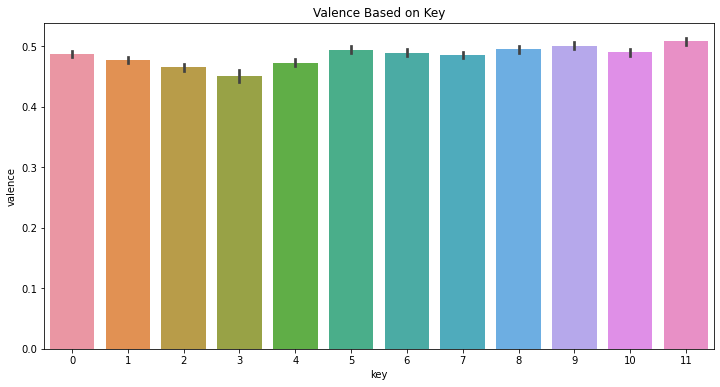

In [18]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'key', y = 'valence', data = spotify)
plt.title('Valence Based on Key')

By checking if the valence is affected by the key, we can see that we have the highest valence for keys 5, 9 and 11.

### Valence Based on mode

Text(0.5, 1.0, 'Valence Based on Mode')

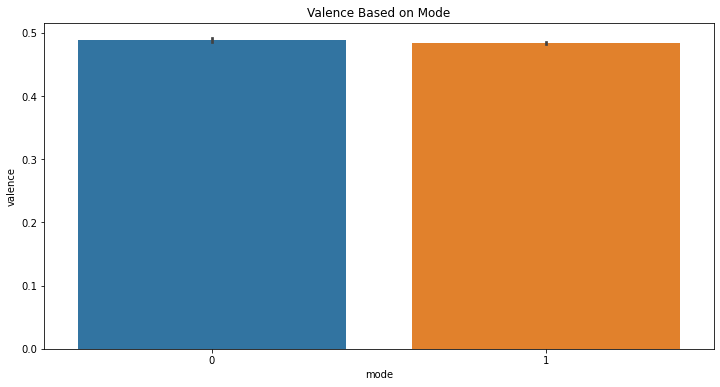

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'mode', y = 'valence', data = spotify)
plt.title('Valence Based on Mode')

The mode doesn't seem to influence the valence a lot.

### Valence Based on time_signature

Text(0.5, 1.0, 'Valence Based on time_signature')

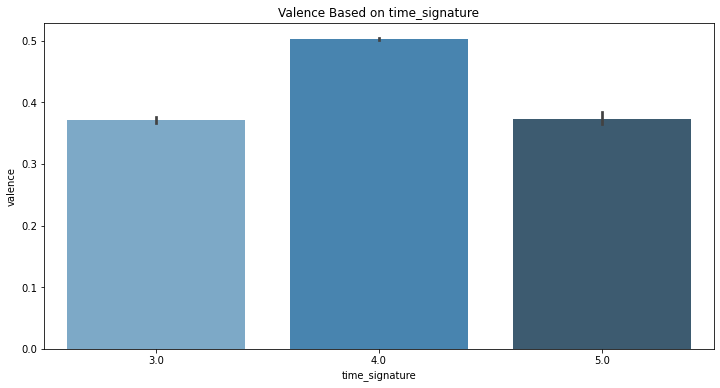

In [20]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'time_signature', y = 'valence', data = spotify, palette="Blues_d")
plt.title('Valence Based on time_signature')

Here we can easily spot that tracks with time_signature `4` (how many beats are in each bar) have a higher valence from songs with `3` or `5`.

* In order to create our model we need to check for multicollinearity.

We will add dummies for the categorical variables.

In [21]:
spotify = pd.get_dummies(spotify, columns=['key'],drop_first=True)
spotify = pd.get_dummies(spotify, columns=['mode'],drop_first=True)
spotify = pd.get_dummies(spotify, columns=['time_signature'],drop_first=True)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(spotify.iloc[:, 1:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const                 120.915509
acousticness            2.253830
danceability            1.697887
duration_ms             1.072233
energy                  4.299088
instrumentalness        1.445952
liveness                1.166172
loudness                3.674167
speechiness             1.489895
tempo                   1.085177
valence                 1.634263
key_1                   1.667526
key_2                   1.665742
key_3                   1.237787
key_4                   1.540853
key_5                   1.581292
key_6                   1.504152
key_7                   1.741924
key_8                   1.446164
key_9                   1.683325
key_10                  1.467110
key_11                  1.599524
mode_1                  1.085877
time_signature_4.0      1.234432
dtype: float64

In [23]:
spotify.rename(columns={'time_signature_4.0': 'time_signature_4','time_signature_5.0': 'time_signature_5' }, inplace=True)
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584,0.606,0.000003,0.1510,-7.447,0.0262,115.018,...,0,0,0,0,0,1,0,0,1,0
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960,0.308,0.000000,0.2530,-10.340,0.9220,115.075,...,0,1,0,0,0,0,0,1,0,0
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840,0.931,0.000000,0.9380,-13.605,0.9440,79.565,...,0,0,0,0,0,0,0,0,1,0
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578,0.126,0.000000,0.1130,-20.254,0.9380,112.822,...,0,0,0,0,0,0,0,0,0,0
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880,0.942,0.000000,0.9170,-13.749,0.9430,81.260,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893,0.904,0.000000,0.0875,-4.578,0.0327,130.186,...,0,0,0,0,0,0,1,1,1,0
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133,0.823,0.005370,0.2420,-5.561,0.0604,184.260,...,0,0,1,0,0,0,0,1,1,0
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107,0.883,0.000001,0.0606,-6.614,0.0653,118.043,...,0,1,0,0,0,0,0,0,1,0
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133,0.748,0.000007,0.0899,-6.426,0.1510,110.015,...,0,0,0,0,1,0,0,1,1,0


Energy variable needs to be removed as it has high VIF.  We will also remove track_id as it can't be in our model (it's not a measurable value)

In [24]:
spotify2 = spotify.drop(labels = ['track_id', 'energy'], axis = 1)
spotify2

,acousticness,danceability,duration_ms,instrumentalness,liveness,loudness,speechiness,tempo,valence,key_1,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,0.294000,0.698,235584,0.000003,0.1510,-7.447,0.0262,115.018,0.6220,0,...,0,0,0,0,0,1,0,0,1,0
1,0.863000,0.719,656960,0.000000,0.2530,-10.340,0.9220,115.075,0.5890,0,...,0,1,0,0,0,0,0,1,0,0
2,0.750000,0.466,492840,0.000000,0.9380,-13.605,0.9440,79.565,0.0850,0,...,0,0,0,0,0,0,0,0,1,0
3,0.763000,0.719,316578,0.000000,0.1130,-20.254,0.9380,112.822,0.5330,0,...,0,0,0,0,0,0,0,0,0,0
4,0.770000,0.460,558880,0.000000,0.9170,-13.749,0.9430,81.260,0.0906,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,0.005640,0.602,178893,0.000000,0.0875,-4.578,0.0327,130.186,0.7870,0,...,0,0,0,0,0,0,1,1,1,0
101935,0.000406,0.177,213133,0.005370,0.2420,-5.561,0.0604,184.260,0.3630,0,...,0,0,1,0,0,0,0,1,1,0
101936,0.004510,0.539,226107,0.000001,0.0606,-6.614,0.0653,118.043,0.4060,0,...,0,1,0,0,0,0,0,0,1,0
101937,0.333000,0.716,224133,0.000007,0.0899,-6.426,0.1510,110.015,0.7600,0,...,0,0,0,0,1,0,0,1,1,0


Let's check VIF again:

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(spotify2.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],index=X.columns)

const               74.463579
acousticness         1.633223
danceability         1.623601
duration_ms          1.071986
instrumentalness     1.383381
liveness             1.115358
loudness             2.195977
speechiness          1.452405
tempo                1.084510
valence              1.491911
key_1                1.665837
key_2                1.665540
key_3                1.237781
key_4                1.540726
key_5                1.581132
key_6                1.503899
key_7                1.741637
key_8                1.445934
key_9                1.683232
key_10               1.466714
key_11               1.599278
mode_1               1.084318
time_signature_4     1.226405
dtype: float64

Everything seems to be fine so we will create our full model.

In [26]:
all_columns = list(spotify2.columns)
all_columns.remove('valence')
all_columns_formula = "valence ~ " + '+'.join(all_columns)
all_columns_formula

'valence ~ acousticness+danceability+duration_ms+instrumentalness+liveness+loudness+speechiness+tempo+key_1+key_2+key_3+key_4+key_5+key_6+key_7+key_8+key_9+key_10+key_11+mode_1+time_signature_4+time_signature_5'

In [27]:
fullmodel = smf.ols(formula=all_columns_formula, data=spotify2)
fullmodel_res = fullmodel.fit()
fullmodel_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2245.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:01:09   Log-Likelihood:                 12805.
No. Observations:              100397   AIC:                        -2.556e+04
Df Residuals:                  100374   BIC:                        -2.535e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0872      0.006     14.844      0.000       0.076       0.099
acousticness         0.0032      0.003      1.239      0.215      -0.002       0.008
danceability         0.6584      0.004    147.290      0.000       0.650       0.667
duration_ms      -5.662e-08   3.67e-09    -15.434      0.000   -6.38e-08   -4.94e-08
instrumentalness    -0.0970      0.003    -37.350      0.000      -0.102      -0.092
liveness             0.0823      0.004     20.259      0.000       0.074       0.090
loudness             0.0064      0.000     38.791      0.000       0.006       0.007
speechiness         -0.0225      0.004     -5.520      0.000      -0.030      -0.015
tempo                0.0006   2.37e-05     25.308      0.000       0.001       0.001
key_1               -0.0255      0.003     -8.729      0.000      -0.031      -0.020
key_2               -0.0084      0.003     -2.927      0.003      -0.014      -0.003
key_3               -0.0010      0.004     -0.226      0.821      -0.009       0.007
key_4               -0.0066      0.003     -2.078      0.038      -0.013      -0.000
key_5                0.0100      0.003      3.257      0.001       0.004       0.016
key_6               -0.0105      0.003     -3.249      0.001      -0.017      -0.004
key_7               -0.0028      0.003     -1.001      0.317      -0.008       0.003
key_8               -0.0047      0.003     -1.417      0.156      -0.011       0.002
key_9                0.0131      0.003      4.527      0.000       0.007       0.019
key_10               0.0023      0.003      0.686      0.493      -0.004       0.009
key_11              -0.0007      0.003     -0.216      0.829      -0.007       0.005
mode_1               0.0147      0.001     10.214      0.000       0.012       0.018
time_signature_4     0.0081      0.002      3.333      0.001       0.003       0.013
time_signature_5    -0.0110      0.005     -2.235      0.025      -0.021      -0.001
==============================================================================
Omnibus:                     2242.447   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.309
Skew:                           0.043   Prob(JB):                    2.49e-258
Kurtosis:                       2.474   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The adjusted R-squared of the full model is 0.33, which means that 33% of the variability is explained by the full model.

We will do forward stepwise selection to find the best variable to add at each step sonce the number of variables is large.

In [28]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [29]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [30]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [31]:
best_model, _ = forward_stepwise_selection(spotify2, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'loudness']
Finding the best model for 3 variables
['danceability', 'loudness', 'instrumentalness']
Finding the best model for 4 variables
['danceability', 'loudness', 'instrumentalness', 'tempo']
Finding the best model for 5 variables
['danceability', 'loudness', 'instrumentalness', 'tempo', 'liveness']
Finding the best model for 6 variables
['danceability', 'loudness', 'instrumentalness', 'tempo', 'liveness', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'loudness', 'instrumentalness', 'tempo', 'liveness', 'duration_ms', 'key_1']
Finding the best model for 8 variables
['danceability', 'loudness', 'instrumentalness', 'tempo', 'liveness', 'duration_ms', 'key_1', 'mode_1']
Finding the best model for 9 variables
['danceability', 'loudness', 'instrumentalness', 'tempo', 'liveness', 'duration_ms', 'key_1', 'mode_1', 'speechiness']
Finding the best model fo

In [32]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2599.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:01:16   Log-Likelihood:                 12805.
No. Observations:              100397   AIC:                        -2.557e+04
Df Residuals:                  100377   BIC:                        -2.538e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0874      0.006     15.524      0.000       0.076       0.098
danceability         0.6584      0.004    147.345      0.000       0.650       0.667
loudness             0.0064      0.000     38.789      0.000       0.006       0.007
instrumentalness    -0.0970      0.003    -37.344      0.000      -0.102      -0.092
tempo                0.0006   2.37e-05     25.305      0.000       0.001       0.001
liveness             0.0823      0.004     20.258      0.000       0.074       0.090
duration_ms      -5.663e-08   3.67e-09    -15.440      0.000   -6.38e-08   -4.94e-08
key_1               -0.0257      0.002    -10.306      0.000      -0.031      -0.021
mode_1               0.0147      0.001     10.352      0.000       0.012       0.017
speechiness         -0.0224      0.004     -5.512      0.000      -0.030      -0.014
key_9                0.0129      0.002      5.262      0.000       0.008       0.018
key_5                0.0098      0.003      3.699      0.000       0.005       0.015
time_signature_4     0.0081      0.002      3.332      0.001       0.003       0.013
key_6               -0.0107      0.003     -3.782      0.000      -0.016      -0.005
key_2               -0.0086      0.002     -3.499      0.000      -0.013      -0.004
time_signature_5    -0.0110      0.005     -2.228      0.026      -0.021      -0.001
key_4               -0.0068      0.003     -2.461      0.014      -0.012      -0.001
key_8               -0.0049      0.003     -1.662      0.097      -0.011       0.001
key_7               -0.0030      0.002     -1.271      0.204      -0.008       0.002
acousticness         0.0032      0.003      1.235      0.217      -0.002       0.008
==============================================================================
Omnibus:                     2242.665   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.400
Skew:                           0.043   Prob(JB):                    2.38e-258
Kurtosis:                       2.474   Cond. No.                     3.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We will also try backward stepwise selection to check if we get a better model.

In [33]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [34]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [35]:
best_model, _ = backward_stepwise_selection(spotify2, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 22 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 21 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 20 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 19 variables
['acousticness', 'danceability', 'duration_ms', 'instrumentalness', 

Both methods end up choosing the same model which is a model with all variables included (some factor levels are removed but we are still using the whole factor variable).

In [36]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2599.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:01:29   Log-Likelihood:                 12805.
No. Observations:              100397   AIC:                        -2.557e+04
Df Residuals:                  100377   BIC:                        -2.538e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept            0.0874      0.006     15.524      0.000       0.076       0.098
acousticness         0.0032      0.003      1.235      0.217      -0.002       0.008
danceability         0.6584      0.004    147.345      0.000       0.650       0.667
duration_ms      -5.663e-08   3.67e-09    -15.440      0.000   -6.38e-08   -4.94e-08
instrumentalness    -0.0970      0.003    -37.344      0.000      -0.102      -0.092
liveness             0.0823      0.004     20.258      0.000       0.074       0.090
loudness             0.0064      0.000     38.789      0.000       0.006       0.007
speechiness         -0.0224      0.004     -5.512      0.000      -0.030      -0.014
tempo                0.0006   2.37e-05     25.305      0.000       0.001       0.001
key_1               -0.0257      0.002    -10.306      0.000      -0.031      -0.021
key_2               -0.0086      0.002     -3.499      0.000      -0.013      -0.004
key_4               -0.0068      0.003     -2.461      0.014      -0.012      -0.001
key_5                0.0098      0.003      3.699      0.000       0.005       0.015
key_6               -0.0107      0.003     -3.782      0.000      -0.016      -0.005
key_7               -0.0030      0.002     -1.271      0.204      -0.008       0.002
key_8               -0.0049      0.003     -1.662      0.097      -0.011       0.001
key_9                0.0129      0.002      5.262      0.000       0.008       0.018
mode_1               0.0147      0.001     10.352      0.000       0.012       0.017
time_signature_4     0.0081      0.002      3.332      0.001       0.003       0.013
time_signature_5    -0.0110      0.005     -2.228      0.026      -0.021      -0.001
==============================================================================
Omnibus:                     2242.665   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.400
Skew:                           0.043   Prob(JB):                    2.38e-258
Kurtosis:                       2.474   Cond. No.                     3.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Normality assumption

We will need to check if the residuals follow the normal distribution. The QQ diagrams shows the residual quantiles and the quantiles of the corresponding normal distribution.
If the residuals follow the normal distribution, we should see the points on the diagonal.

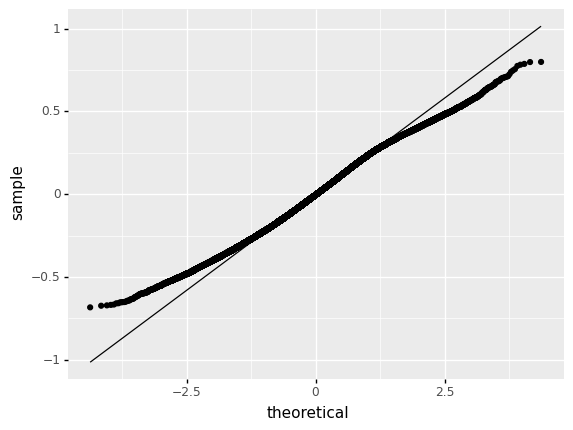

<ggplot: (8786150594106)>

In [37]:
ggplot(data=fullmodel_res.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

The assumption of normality for the residuals seems to be violated as the points to not lie on a straight line.

#### Linearity and homoscedasticity assumption

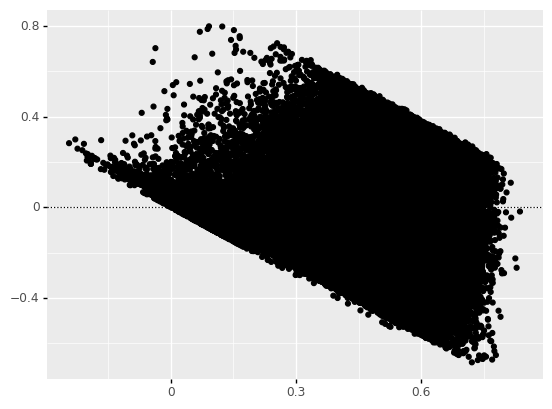

<ggplot: (8786147486422)>

In [38]:
ggplot(data=spotify2) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x=fullmodel_res.fittedvalues, y=fullmodel_res.resid))

In order to have homoscedasticity the resulting diagram should not have any kind of patterns. Here we can clearly see a descending trend so the assumption is violated. On the other hand, linearity assumption doesn't seem to be violated.

#### Indepedence assumption

In [39]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fullmodel_res.resid)

1.992580562798985

Indepedence assumption is not violated since Durbin Watson's test gave us a value of 1.99, which is in range of 1.5 and 2.5 which are considered normal

* Full model's parameters

In [40]:
fullmodel_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     2245.
Date:                Wed, 20 Apr 2022   Prob (F-statistic):               0.00
Time:                        18:01:35   Log-Likelihood:                 12805.
No. Observations:              100397   AIC:                        -2.556e+04
Df Residuals:                  100374   BIC:                        -2.535e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0872      0.006     14.844      0.000       0.076       0.099
acousticness         0.0032      0.003      1.239      0.215      -0.002       0.008
danceability         0.6584      0.004    147.290      0.000       0.650       0.667
duration_ms      -5.662e-08   3.67e-09    -15.434      0.000   -6.38e-08   -4.94e-08
instrumentalness    -0.0970      0.003    -37.350      0.000      -0.102      -0.092
liveness             0.0823      0.004     20.259      0.000       0.074       0.090
loudness             0.0064      0.000     38.791      0.000       0.006       0.007
speechiness         -0.0225      0.004     -5.520      0.000      -0.030      -0.015
tempo                0.0006   2.37e-05     25.308      0.000       0.001       0.001
key_1               -0.0255      0.003     -8.729      0.000      -0.031      -0.020
key_2               -0.0084      0.003     -2.927      0.003      -0.014      -0.003
key_3               -0.0010      0.004     -0.226      0.821      -0.009       0.007
key_4               -0.0066      0.003     -2.078      0.038      -0.013      -0.000
key_5                0.0100      0.003      3.257      0.001       0.004       0.016
key_6               -0.0105      0.003     -3.249      0.001      -0.017      -0.004
key_7               -0.0028      0.003     -1.001      0.317      -0.008       0.003
key_8               -0.0047      0.003     -1.417      0.156      -0.011       0.002
key_9                0.0131      0.003      4.527      0.000       0.007       0.019
key_10               0.0023      0.003      0.686      0.493      -0.004       0.009
key_11              -0.0007      0.003     -0.216      0.829      -0.007       0.005
mode_1               0.0147      0.001     10.214      0.000       0.012       0.018
time_signature_4     0.0081      0.002      3.333      0.001       0.003       0.013
time_signature_5    -0.0110      0.005     -2.235      0.025      -0.021      -0.001
==============================================================================
Omnibus:                     2242.447   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1186.309
Skew:                           0.043   Prob(JB):                    2.49e-258
Kurtosis:                       2.474   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Interpretation of the coefficients

***Intercept*** : When all the numeric variables are equal to zero and key is 0, mode is 0 and time_signature is 3, then the expected value of the valence is equal to 0.0872.

***acousticness***: If we increase acousticness by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0032 increase in valence.

***danceability***: If we increase danceability by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.6584 increase in valence.

***duration_ms***: If we increase duration_ms by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.00000005 decrease in valence. (almost non existent change)

***instrumentalness***: If we increase instrumentalness by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0970 decrease in valence.

***liveness***: If we increase liveness by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0823 increase in valence.

***loudness***: If we increase loudness by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0064 increase in valence.

***speechiness***: If we increase speechiness by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0225 decrease in valence.

***tempo***: If we increase tempo by one with the rest covariates unchanged (e.g., key is 0, mode is 0 and time_signature is 3 and the rest numeric covariates constant) then we will have 0.0006 increase in valence.

***key***: If we change the key from 0 to 1 there is a 0.0255 decrease in valence with the rest covariates remain unchanged(e.g., mode is 0 and time_signature is 3 and the rest numeric covariates constant). If we change the key from 0 to 1 there is a 0.0084 decrease in valence with the rest covariates remain unchanged(e.g., mode is 0 and time_signature is 3 and the rest numeric covariates constant).
We would interpret the rest of the levels with the same logic.

***mode***: If we change the mode from 0 to 1 there is a 0.0147 increase in valence with the rest covariates remain unchanged (e.g., key is 0 and time_signature is 3 and the rest numeric covariates constant). 
We would interpret the rest of the levels with the same logic.

***time_signature***: If we change the time_signature from 3 to 4 there is a 0.0081 increase in valence with the rest covariates remain unchanged (e.g., key is 0 and mode is 0 and the rest numeric covariates constant). 
We would interpret the rest of the levels with the same logic.

### Loading valuation dataset

* Loading the spotify ids:

In [41]:
spotify_ids = pd.read_csv("spotify_ids.txt", sep=" ", header=None)
spotify_ids

,0
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


* Renaming the column from `0` to `track_id`.

In [42]:
spotify_ids.columns = ["song_id"]
spotify_ids

,song_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


In [43]:
len(spotify_ids)

1162

* Creating a Spotify client:

In [44]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(
    client_id = 'd46dda410c5244c5b20072dbc00e8a83',
    client_secret ='27a9020262e747b888faa941aad607ee'
)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

* We'll create a dictionary keyed by `song_id`, with values being the audio features for the specific track.

In [45]:
features = {}
all_track_ids = list(spotify_ids['song_id'].unique())

In [46]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


* Let's make sure we have the correct amount of ids:

In [47]:
len(features)

1162

* This is how the features look like:

In [48]:
features['4JE6agBLHGA5TaF6FlqfBD']

{'danceability': 0.331,
 'energy': 0.45,
 'key': 10,
 'loudness': -5.362,
 'mode': 1,
 'speechiness': 0.034,
 'acousticness': 0.365,
 'instrumentalness': 0.00464,
 'liveness': 0.22,
 'valence': 0.18,
 'tempo': 123.829,
 'type': 'audio_features',
 'id': '4JE6agBLHGA5TaF6FlqfBD',
 'uri': 'spotify:track:4JE6agBLHGA5TaF6FlqfBD',
 'track_href': 'https://api.spotify.com/v1/tracks/4JE6agBLHGA5TaF6FlqfBD',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4JE6agBLHGA5TaF6FlqfBD',
 'duration_ms': 218755,
 'time_signature': 4}

* We will create a data frame from the dictionary we created:

In [49]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


* The index contains the ID of each song, as does the `id` column, so we'll keep one of the two.

In [50]:
tracks = tracks.reset_index(drop=True).rename(columns={'id' : 'song_id'})
tracks = tracks.rename(columns={'song_id':'track_id'})

In [51]:
tracks=tracks.set_index('track_id')
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
track_id,,,,,,,,,,,,,,,,,
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4


* We need to check if there are song ids both in the test and the train dataset in order to remove them.

In [52]:
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584,0.606,0.000003,0.1510,-7.447,0.0262,115.018,...,0,0,0,0,0,1,0,0,1,0
1,3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960,0.308,0.000000,0.2530,-10.340,0.9220,115.075,...,0,1,0,0,0,0,0,1,0,0
2,1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840,0.931,0.000000,0.9380,-13.605,0.9440,79.565,...,0,0,0,0,0,0,0,0,1,0
3,6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578,0.126,0.000000,0.1130,-20.254,0.9380,112.822,...,0,0,0,0,0,0,0,0,0,0
4,1Vo802A38tPFHmje1h91um,0.770000,0.460,558880,0.942,0.000000,0.9170,-13.749,0.9430,81.260,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893,0.904,0.000000,0.0875,-4.578,0.0327,130.186,...,0,0,0,0,0,0,1,1,1,0
101935,58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133,0.823,0.005370,0.2420,-5.561,0.0604,184.260,...,0,0,1,0,0,0,0,1,1,0
101936,2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107,0.883,0.000001,0.0606,-6.614,0.0653,118.043,...,0,1,0,0,0,0,0,0,1,0
101937,1pXtUVmSS3Aky3j6nQ4sQT,0.333000,0.716,224133,0.748,0.000007,0.0899,-6.426,0.1510,110.015,...,0,0,0,0,1,0,0,1,1,0


In [53]:
spotify=spotify.set_index('track_id')
spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
track_id,,,,,,,,,,,,,,,,,,,,,
5qljLQuKnNJf4F4vfxQB0V,0.294000,0.698,235584,0.606,0.000003,0.1510,-7.447,0.0262,115.018,0.6220,...,0,0,0,0,0,1,0,0,1,0
3VAX2MJdmdqARLSU5hPMpm,0.863000,0.719,656960,0.308,0.000000,0.2530,-10.340,0.9220,115.075,0.5890,...,0,1,0,0,0,0,0,1,0,0
1L3YAhsEMrGVvCgDXj2TYn,0.750000,0.466,492840,0.931,0.000000,0.9380,-13.605,0.9440,79.565,0.0850,...,0,0,0,0,0,0,0,0,1,0
6aCe9zzoZmCojX7bbgKKtf,0.763000,0.719,316578,0.126,0.000000,0.1130,-20.254,0.9380,112.822,0.5330,...,0,0,0,0,0,0,0,0,0,0
1Vo802A38tPFHmje1h91um,0.770000,0.460,558880,0.942,0.000000,0.9170,-13.749,0.9430,81.260,0.0906,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4e5wI6VC4eVDTtpyZ409Pw,0.005640,0.602,178893,0.904,0.000000,0.0875,-4.578,0.0327,130.186,0.7870,...,0,0,0,0,0,0,1,1,1,0
58nHFSWj5N5JxNtWgS85TL,0.000406,0.177,213133,0.823,0.005370,0.2420,-5.561,0.0604,184.260,0.3630,...,0,0,1,0,0,0,0,1,1,0
2RDgs05sg2vrpwiAEUkWd0,0.004510,0.539,226107,0.883,0.000001,0.0606,-6.614,0.0653,118.043,0.4060,...,0,1,0,0,0,0,0,0,1,0


In [54]:
commontracks = pd.merge(tracks,spotify,on='track_id')
commontracks

,danceability_x,energy_x,key,loudness_x,mode,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
track_id,,,,,,,,,,,,,,,,,,,,,
2QjOHCTQ1Jl3zawyYOpxh6,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.017700,0.1010,0.398,...,0,0,0,0,0,1,0,1,1,0
6gBFPUFcJLzWGx4lenP6h2,0.841,0.728,7,-3.370,1,0.0484,0.084700,0.000000,0.1490,0.430,...,0,0,1,0,0,0,0,1,1,0
5uCax9HTNlzGybIStD3vDh,0.358,0.557,10,-7.398,1,0.0590,0.695000,0.000000,0.0902,0.494,...,0,0,0,0,0,1,0,1,1,0
5E30LdtzQTGqRvNd7l6kG5,0.588,0.521,10,-9.461,1,0.0329,0.067800,0.149000,0.1230,0.337,...,0,0,0,0,0,1,0,1,1,0
0tgVpDi06FyKpA1z0VMD4v,0.599,0.448,8,-6.312,1,0.0232,0.163000,0.000000,0.1060,0.168,...,0,0,0,1,0,0,0,1,0,0
7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.581000,0.000000,0.0931,0.931,...,0,0,0,0,0,0,0,0,1,0
7m9OqQk4RVRkw9JJdeAw96,0.872,0.391,0,-9.144,0,0.2420,0.469000,0.000004,0.2970,0.437,...,0,0,0,0,0,0,0,0,1,0
0ofHAoxe9vBkTCp2UQIavz,0.828,0.492,0,-9.744,1,0.0276,0.064400,0.004280,0.1280,0.789,...,0,0,0,0,0,0,0,1,1,0
3U4isOIWM3VvDubwSI3y7a,0.422,0.264,8,-7.064,1,0.0322,0.922000,0.000000,0.1320,0.331,...,0,0,0,1,0,0,0,1,1,0


* Removing the tracks that exist in our train dataset as well:

In [55]:
spotify = pd.DataFrame(spotify, index = set(spotify.index).difference(set(commontracks.index))).reset_index()

In [56]:
spotify

,index,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,1jeWrScZZuhw3b55T1fv4O,0.623000,0.261,291160,0.3800,0.000000,0.1050,-9.148,0.0491,74.463,...,0,0,0,0,0,0,0,1,1,0
1,0uYv1tNoIHUt6XPjLME4cA,0.000032,0.397,226000,0.9970,0.002160,0.0255,-4.482,0.0667,97.403,...,0,0,0,0,0,1,0,1,1,0
2,30YV8LO68BIY5fhKbzrENB,0.243000,0.484,194640,0.4070,0.000044,0.1210,-10.029,0.0298,96.134,...,0,0,0,0,1,0,0,0,1,0
3,6p0FS5Vn8oP0yS7VclPs6z,0.045900,0.387,170659,0.8660,0.000000,0.3920,-6.022,0.2620,189.577,...,0,0,0,0,0,0,1,1,0,0
4,4lF8Nolm1dYDTk7Ryn7NSR,0.072500,0.783,193627,0.4660,0.000000,0.1400,-5.269,0.0608,109.939,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100350,4D5Ode2OfZMxIwQyvmhUe8,0.011400,0.791,189846,0.7890,0.000000,0.3010,-4.694,0.1040,112.110,...,0,0,0,0,0,0,1,0,1,0
100351,6NxlMsCFLQYEPOcyqJJqXh,0.341000,0.478,308505,0.7510,0.000000,0.0953,-4.489,0.0464,116.714,...,0,0,0,0,0,0,0,0,1,0
100352,2SuuioSK8HAzWSneSXpvA7,0.740000,0.664,213981,0.2490,0.000000,0.2120,-9.347,0.0326,88.961,...,0,0,0,0,0,0,0,1,1,0
100353,1juPQIH0GuTLGYuvSeDYqd,0.360000,0.639,259457,0.5830,0.001980,0.1060,-8.551,0.0254,115.030,...,0,0,0,0,0,0,1,0,1,0


* Just to make sure everything is correctly removed:

In [57]:
spotify = spotify.rename(columns={'index':'track_id'})
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,1jeWrScZZuhw3b55T1fv4O,0.623000,0.261,291160,0.3800,0.000000,0.1050,-9.148,0.0491,74.463,...,0,0,0,0,0,0,0,1,1,0
1,0uYv1tNoIHUt6XPjLME4cA,0.000032,0.397,226000,0.9970,0.002160,0.0255,-4.482,0.0667,97.403,...,0,0,0,0,0,1,0,1,1,0
2,30YV8LO68BIY5fhKbzrENB,0.243000,0.484,194640,0.4070,0.000044,0.1210,-10.029,0.0298,96.134,...,0,0,0,0,1,0,0,0,1,0
3,6p0FS5Vn8oP0yS7VclPs6z,0.045900,0.387,170659,0.8660,0.000000,0.3920,-6.022,0.2620,189.577,...,0,0,0,0,0,0,1,1,0,0
4,4lF8Nolm1dYDTk7Ryn7NSR,0.072500,0.783,193627,0.4660,0.000000,0.1400,-5.269,0.0608,109.939,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100350,4D5Ode2OfZMxIwQyvmhUe8,0.011400,0.791,189846,0.7890,0.000000,0.3010,-4.694,0.1040,112.110,...,0,0,0,0,0,0,1,0,1,0
100351,6NxlMsCFLQYEPOcyqJJqXh,0.341000,0.478,308505,0.7510,0.000000,0.0953,-4.489,0.0464,116.714,...,0,0,0,0,0,0,0,0,1,0
100352,2SuuioSK8HAzWSneSXpvA7,0.740000,0.664,213981,0.2490,0.000000,0.2120,-9.347,0.0326,88.961,...,0,0,0,0,0,0,0,1,1,0
100353,1juPQIH0GuTLGYuvSeDYqd,0.360000,0.639,259457,0.5830,0.001980,0.1060,-8.551,0.0254,115.030,...,0,0,0,0,0,0,1,0,1,0


In [58]:
column_to_move = spotify.pop('valence')
spotify['valence'] = column_to_move
spotify

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
0,1jeWrScZZuhw3b55T1fv4O,0.623000,0.261,291160,0.3800,0.000000,0.1050,-9.148,0.0491,74.463,...,0,0,0,0,0,0,1,1,0,0.0793
1,0uYv1tNoIHUt6XPjLME4cA,0.000032,0.397,226000,0.9970,0.002160,0.0255,-4.482,0.0667,97.403,...,0,0,0,0,1,0,1,1,0,0.4500
2,30YV8LO68BIY5fhKbzrENB,0.243000,0.484,194640,0.4070,0.000044,0.1210,-10.029,0.0298,96.134,...,0,0,0,1,0,0,0,1,0,0.0892
3,6p0FS5Vn8oP0yS7VclPs6z,0.045900,0.387,170659,0.8660,0.000000,0.3920,-6.022,0.2620,189.577,...,0,0,0,0,0,1,1,0,0,0.7490
4,4lF8Nolm1dYDTk7Ryn7NSR,0.072500,0.783,193627,0.4660,0.000000,0.1400,-5.269,0.0608,109.939,...,0,0,0,0,0,0,0,1,0,0.0566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100350,4D5Ode2OfZMxIwQyvmhUe8,0.011400,0.791,189846,0.7890,0.000000,0.3010,-4.694,0.1040,112.110,...,0,0,0,0,0,1,0,1,0,0.6690
100351,6NxlMsCFLQYEPOcyqJJqXh,0.341000,0.478,308505,0.7510,0.000000,0.0953,-4.489,0.0464,116.714,...,0,0,0,0,0,0,0,1,0,0.4670
100352,2SuuioSK8HAzWSneSXpvA7,0.740000,0.664,213981,0.2490,0.000000,0.2120,-9.347,0.0326,88.961,...,0,0,0,0,0,0,1,1,0,0.3910
100353,1juPQIH0GuTLGYuvSeDYqd,0.360000,0.639,259457,0.5830,0.001980,0.1060,-8.551,0.0254,115.030,...,0,0,0,0,0,1,0,1,0,0.3470


In [59]:
commontracks = commontracks.reset_index()
commontracks.head(10)

,track_id,danceability_x,energy_x,key,loudness_x,mode,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5
0,2QjOHCTQ1Jl3zawyYOpxh6,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,...,0,0,0,0,0,1,0,1,1,0
1,6gBFPUFcJLzWGx4lenP6h2,0.841,0.728,7,-3.370,1,0.0484,0.08470,0.000000,0.1490,...,0,0,1,0,0,0,0,1,1,0
2,5uCax9HTNlzGybIStD3vDh,0.358,0.557,10,-7.398,1,0.0590,0.69500,0.000000,0.0902,...,0,0,0,0,0,1,0,1,1,0
3,5E30LdtzQTGqRvNd7l6kG5,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,...,0,0,0,0,0,1,0,1,1,0
4,0tgVpDi06FyKpA1z0VMD4v,0.599,0.448,8,-6.312,1,0.0232,0.16300,0.000000,0.1060,...,0,0,0,1,0,0,0,1,0,0
5,7qiZfU4dY1lWllzX7mPBI3,0.825,0.652,1,-3.183,0,0.0802,0.58100,0.000000,0.0931,...,0,0,0,0,0,0,0,0,1,0
6,7m9OqQk4RVRkw9JJdeAw96,0.872,0.391,0,-9.144,0,0.2420,0.46900,0.000004,0.2970,...,0,0,0,0,0,0,0,0,1,0
7,0ofHAoxe9vBkTCp2UQIavz,0.828,0.492,0,-9.744,1,0.0276,0.06440,0.004280,0.1280,...,0,0,0,0,0,0,0,1,1,0
8,3U4isOIWM3VvDubwSI3y7a,0.422,0.264,8,-7.064,1,0.0322,0.92200,0.000000,0.1320,...,0,0,0,1,0,0,0,1,1,0
9,2xLMifQCjDGFmkHkpNLD9h,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,...,0,0,0,1,0,0,0,1,1,0


In [60]:
commontracks2 = pd.merge(commontracks,spotify,on='track_id')
commontracks2

,track_id,danceability_x,energy_x,key,loudness_x,mode,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,key_6_y,key_7_y,key_8_y,key_9_y,key_10_y,key_11_y,mode_1_y,time_signature_4_y,time_signature_5_y,valence


* Everything seems to be correct so we can move to cleaning the valuation dataset.

In [61]:
tracks = tracks.loc[:,['acousticness','danceability','duration_ms', 'energy', 'instrumentalness', 'key', 
'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature','valence']]
tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
track_id,,,,,,,,,,,,,
7lPN2DXiMsVn7XUKtOW1CS,0.72100,0.585,242014,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,4,0.132
5QO79kh1waicV47BqGRL3g,0.02120,0.680,215627,0.826,0.000012,0,0.5430,-5.487,1,0.0309,118.051,4,0.644
0VjIjW4GlUZAMYd2vXMi3b,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4,0.334
4MzXwWMhyBbmu6hOcLVD49,0.40100,0.731,205090,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,4,0.145
5Kskr9LcNYa0tpt5f0ZEJx,0.45100,0.907,205458,0.393,0.000001,4,0.1350,-7.636,0,0.0539,104.949,4,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.13800,0.596,257428,0.650,0.000000,9,0.1400,-5.167,1,0.3370,133.997,4,0.188
1fzf9Aad4y1RWrmwosAK5y,0.16800,0.588,187310,0.850,0.002020,4,0.0465,-6.431,1,0.0318,93.003,4,0.768
3E3pb3qH11iny6TFDJvsg5,0.17900,0.754,209299,0.660,0.000000,0,0.1940,-6.811,1,0.2670,83.000,4,0.316


In [62]:
tracks = tracks.reset_index(drop=True)

Checking the types of the variables:

In [63]:
tracks.dtypes

acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
dtype: object

`Time_signature` needs to be an integer:

In [64]:
tracks['time_signature'] = tracks['time_signature'].astype('int')

In [65]:
tracks.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,1162.000000,1162.000000,1162.000000,1162.00000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000,1162.000000
mean,0.264759,0.661078,201982.962134,0.62760,0.012910,5.250430,0.177639,-6.443415,0.611015,0.106310,121.763456,3.956110,0.511865
std,0.266273,0.148715,54373.045929,0.17371,0.080560,3.584362,0.142202,2.555777,0.487730,0.099097,30.083622,0.330429,0.233421
min,0.000025,0.150000,52062.000000,0.04740,0.000000,0.000000,0.026000,-22.507000,0.000000,0.023200,46.718000,1.000000,0.032000
25%,0.046600,0.574000,168022.500000,0.52400,0.000000,2.000000,0.094125,-7.612750,0.000000,0.040600,97.015000,4.000000,0.330250
50%,0.170000,0.675000,195979.000000,0.64700,0.000000,5.000000,0.123000,-6.107000,1.000000,0.062250,120.031000,4.000000,0.511000
75%,0.414000,0.773000,226101.750000,0.74975,0.000032,8.000000,0.217750,-4.665750,1.000000,0.128750,142.002000,4.000000,0.691000
max,0.994000,0.980000,690732.000000,0.98900,0.927000,11.000000,0.977000,-0.515000,1.000000,0.564000,208.918000,5.000000,0.978000


From describe we can spot that `time_signature` has the wrong range again:

In [66]:
np.unique(tracks[['time_signature']].values)

array([1, 3, 4, 5])

We will set those equal to 1 as None:

In [67]:
tracks['time_signature'].loc[tracks['time_signature'] == 1] = None

/Users/mariannakonstantopoulou/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
tracks.isna().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      6
valence             0
dtype: int64

In [69]:
tracks.dropna()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.72100,0.585,242014,0.436,0.000013,10,0.1050,-8.761,1,0.0601,143.874,4.0,0.132
1,0.02120,0.680,215627,0.826,0.000012,0,0.5430,-5.487,1,0.0309,118.051,4.0,0.644
2,0.00146,0.514,200040,0.730,0.000095,1,0.0897,-5.934,1,0.0598,171.005,4.0,0.334
3,0.40100,0.731,205090,0.573,0.000052,4,0.1130,-10.059,0,0.0544,109.928,4.0,0.145
4,0.45100,0.907,205458,0.393,0.000001,4,0.1350,-7.636,0,0.0539,104.949,4.0,0.202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.13800,0.596,257428,0.650,0.000000,9,0.1400,-5.167,1,0.3370,133.997,4.0,0.188
1158,0.16800,0.588,187310,0.850,0.002020,4,0.0465,-6.431,1,0.0318,93.003,4.0,0.768
1159,0.17900,0.754,209299,0.660,0.000000,0,0.1940,-6.811,1,0.2670,83.000,4.0,0.316
1160,0.05580,0.584,202204,0.836,0.000000,0,0.0663,-4.925,1,0.0790,104.973,4.0,0.484


* Creating dummies for the factor variables:

In [70]:
tracks = pd.get_dummies(tracks, columns=['key'],drop_first=True)
tracks = pd.get_dummies(tracks, columns=['mode'],drop_first=True)
tracks = pd.get_dummies(tracks, columns=['time_signature'],drop_first=True)
tracks

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,...,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4.0,time_signature_5.0
0,0.72100,0.585,242014,0.436,0.000013,0.1050,-8.761,0.0601,143.874,0.132,...,0,0,0,0,0,1,0,1,1,0
1,0.02120,0.680,215627,0.826,0.000012,0.5430,-5.487,0.0309,118.051,0.644,...,0,0,0,0,0,0,0,1,1,0
2,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,0.334,...,0,0,0,0,0,0,0,1,1,0
3,0.40100,0.731,205090,0.573,0.000052,0.1130,-10.059,0.0544,109.928,0.145,...,0,0,0,0,0,0,0,0,1,0
4,0.45100,0.907,205458,0.393,0.000001,0.1350,-7.636,0.0539,104.949,0.202,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.13800,0.596,257428,0.650,0.000000,0.1400,-5.167,0.3370,133.997,0.188,...,0,0,0,0,1,0,0,1,1,0
1158,0.16800,0.588,187310,0.850,0.002020,0.0465,-6.431,0.0318,93.003,0.768,...,0,0,0,0,0,0,0,1,1,0
1159,0.17900,0.754,209299,0.660,0.000000,0.1940,-6.811,0.2670,83.000,0.316,...,0,0,0,0,0,0,0,1,1,0
1160,0.05580,0.584,202204,0.836,0.000000,0.0663,-4.925,0.0790,104.973,0.484,...,0,0,0,0,0,0,0,1,1,0


### Q2: Predict Valence

Use Machine Learning techniques to predict valence based on track features:

The 3(+1) techniques I will use will be the following:
#### Regression
* Regression Decision Tree
* XGBoost
* Linear Regression

#### Classification
* Stochastic Gradient Descent


###  Method 1: Regression Decision Tree

Since the `valence` variable is continuous from 0 to 1 we can use the Regression Decision Tree to predict it based on track features.

First step would be to split out dataset to train and test (80/20):

In [71]:
spotify3 = spotify.drop(labels = ['track_id'], axis = 1)
spotify3

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
0,0.623000,0.261,291160,0.3800,0.000000,0.1050,-9.148,0.0491,74.463,0,...,0,0,0,0,0,0,1,1,0,0.0793
1,0.000032,0.397,226000,0.9970,0.002160,0.0255,-4.482,0.0667,97.403,0,...,0,0,0,0,1,0,1,1,0,0.4500
2,0.243000,0.484,194640,0.4070,0.000044,0.1210,-10.029,0.0298,96.134,0,...,0,0,0,1,0,0,0,1,0,0.0892
3,0.045900,0.387,170659,0.8660,0.000000,0.3920,-6.022,0.2620,189.577,0,...,0,0,0,0,0,1,1,0,0,0.7490
4,0.072500,0.783,193627,0.4660,0.000000,0.1400,-5.269,0.0608,109.939,0,...,0,0,0,0,0,0,0,1,0,0.0566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100350,0.011400,0.791,189846,0.7890,0.000000,0.3010,-4.694,0.1040,112.110,0,...,0,0,0,0,0,1,0,1,0,0.6690
100351,0.341000,0.478,308505,0.7510,0.000000,0.0953,-4.489,0.0464,116.714,0,...,0,0,0,0,0,0,0,1,0,0.4670
100352,0.740000,0.664,213981,0.2490,0.000000,0.2120,-9.347,0.0326,88.961,0,...,0,0,0,0,0,0,1,1,0,0.3910
100353,0.360000,0.639,259457,0.5830,0.001980,0.1060,-8.551,0.0254,115.030,0,...,0,0,0,0,0,1,0,1,0,0.3470


In [72]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(spotify3.iloc[:,0:23], spotify3.valence, 
                                                    test_size=0.20, random_state=111)

* We will try different max_depth values and running k-fold validation to get the scores, in order to figure out if we can predict better by increasing the number of levels.

In [73]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

from scipy.stats import sem

all_depths = []
all_mean_scores = []

for max_depth in range(1, 12):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    cv = KFold(n_splits=5, shuffle=True, random_state=13)
    scores = cross_val_score(simple_tree, X1_train, y1_train, cv=cv)
    mean_score = np.mean(scores)
    all_mean_scores.append(np.mean(scores))
    print("max_depth = ", max_depth, scores, mean_score, sem(scores))

max_depth =  1 [0.17776745 0.1686713  0.17765309 0.17947039 0.1774062 ] 0.17619368668770263 0.001915722829452439
max_depth =  2 [0.27701909 0.26336168 0.26385188 0.27472234 0.2681657 ] 0.26942413827437417 0.0027851514762614487
max_depth =  3 [0.32121169 0.30570264 0.30942409 0.31869398 0.31239489] 0.3134854561968444 0.0028729741896469157
max_depth =  4 [0.34619344 0.33643567 0.3389455  0.34112232 0.34068366] 0.3406761185021604 0.0016064942944590893
max_depth =  5 [0.37070275 0.36104075 0.36580374 0.36426842 0.36506782] 0.3653766949986169 0.0015600214045162813
max_depth =  6 [0.38732002 0.37849579 0.3867397  0.38013108 0.38404701] 0.38334672110650486 0.0017558721648617832
max_depth =  7 [0.39688699 0.39159619 0.3959645  0.39388009 0.39513824] 0.39469319908794775 0.0009186834849776112
max_depth =  8 [0.40422237 0.39812294 0.40529377 0.40274935 0.40212696] 0.40250307940321317 0.001227428152534176
max_depth =  9 [0.40726444 0.40112109 0.4091685  0.40513232 0.40062317] 0.4046619015624911 0.

* The best result is at `max_depth=9`.

Text(0, 0.5, 'mean score')

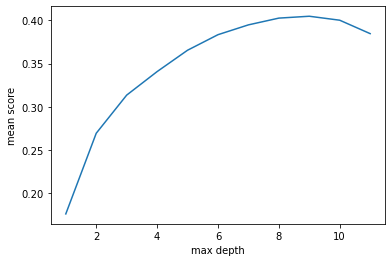

In [74]:
plt.plot(all_depths, all_mean_scores, label='True y')
plt.xlabel('max depth')
plt.ylabel('mean score')

* Using `GridSearchCV` we can doublecheck this:

In [75]:
from sklearn.model_selection import GridSearchCV


parameters = [
  {'max_depth': list(range(1, 15))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(X1_train, y1_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=9)
{'max_depth': 9}


* Let's fit the model:

In [76]:
simple_tree = DecisionTreeRegressor(max_depth=9)
simple_tree.fit(X1_train, y1_train)

DecisionTreeRegressor(max_depth=9)

* We can now test the performance of our dataset by calculating the Mean Absolute Error, using the test dataset we created beforehand (80/20 split).

In [77]:
from sklearn.metrics import mean_absolute_error as mae

y1_pred  = simple_tree.predict(X1_test) 

print(mae(y1_test, y1_pred))

0.15926592428168487


* We must also check the importance of our features and how much they influence the `valence`. For this, we will create a dataframe with the features and the coefficients:

In [78]:
importance_simple = pd.DataFrame()
importance_simple['features'] = spotify3.columns[0:23]
importance_simple['coefficients'] = simple_tree.feature_importances_
importance_simple

,features,coefficients
0,acousticness,3.892906e-02
1,danceability,5.045590e-01
2,duration_ms,4.409044e-02
3,energy,2.705042e-01
4,instrumentalness,4.303753e-02
5,liveness,2.023294e-02
6,loudness,2.142518e-02
7,speechiness,2.755146e-02
8,tempo,2.877464e-02
9,key_1,1.047939e-04


* Plot the feature importances of the regression decision tree:

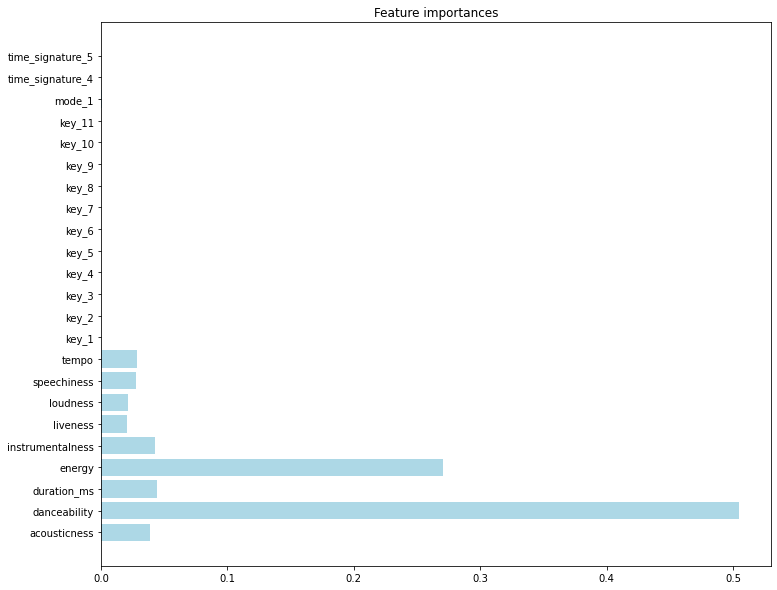

In [79]:
plt.figure(figsize=(12, 10))
plt.title("Feature importances")
plt.barh(importance_simple['features'], importance_simple['coefficients'], color="lightblue", align="center")
plt.show()

As we can see the feature that influences `valence` the most is `danceability`, followed by `energy`. `Tempo`, `speechiness`, `loudness`, `liveness`, `instrumentalness`, `duration_ms` and `acousticness` have a visible influence as well, while the rest of the variables `key`, `mode` and `time_signature` don't have any influence.

###  Method 2: XGBoost

First step would be to split out dataset to train and test (80/20):

In [143]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(spotify3.iloc[:,0:23], spotify3.valence, 
                                                    test_size=0.20, random_state=89)

* To run XGBoost we build an XGBRegressor and by default it creates 100 trees.

In [144]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X2_train, y2_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

* We will then predict.

In [145]:
preds = xgb_reg.predict(X2_test)

* We can now test the performance of our dataset by calculating the Mean Absolute Error, using the test dataset we created beforehand (80/20 split).

In [146]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y2_test, preds)

0.14336544281535443

* We must also check the importance of our features and how much they influence the `valence`. For this, we will create a dataframe with the features and the coefficients:

In [147]:
importance_xgb = pd.DataFrame()
importance_xgb['features'] = spotify3.columns[0:23]
importance_xgb['coefficients'] = xgb_reg.feature_importances_
importance_xgb

,features,coefficients
0,acousticness,0.035288
1,danceability,0.292068
2,duration_ms,0.039967
3,energy,0.164194
4,instrumentalness,0.063102
5,liveness,0.041513
6,loudness,0.029708
7,speechiness,0.044878
8,tempo,0.039080
9,key_1,0.032171


* Plot the feature importances of the XGBoost:

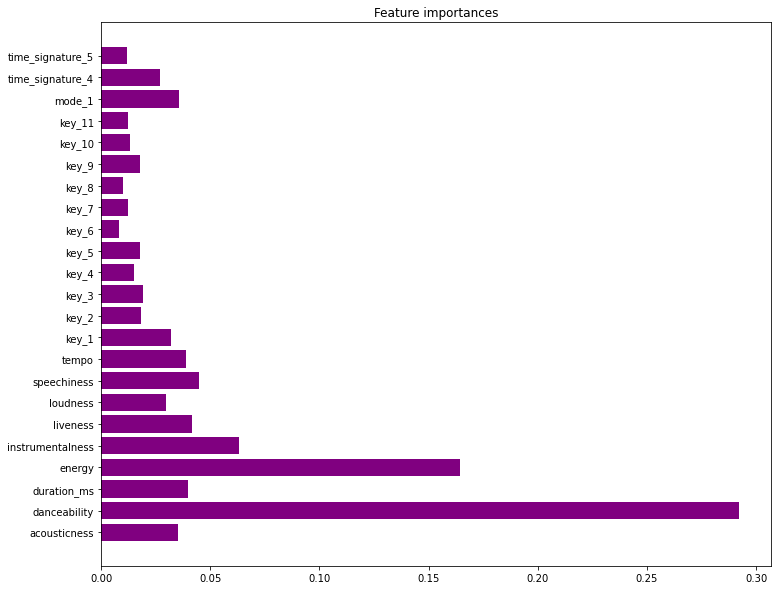

In [148]:
plt.figure(figsize=(12, 10))
plt.title("Feature importances")
plt.barh(importance_xgb['features'], importance_xgb['coefficients'], color="purple", align="center")
plt.show()

As we can see the feature that influences `valence` the most is `danceability`, followed by `energy`. For this method we can see a difference on the influence of the rest variables as `tempo`, `speechiness`, `loudness`, `liveness`, `instrumentalness`, `duration_ms` and `acousticness` have a visible influence as well as the rest of the variables `key`, `mode` and `time_signature` have also influence in `valence`.

### Method 3: Linear Regression

Firstly we will split out dataset to train and test (80/20):

In [86]:
from sklearn.model_selection import train_test_split

X3_train, X3_test, y3_train, y3_test = train_test_split(spotify3.iloc[:,0:23], spotify3.valence, 
                                                    test_size=0.20, random_state=111)

* Setting the variables:

In [87]:
X = spotify3.iloc[:,0:23]
y = spotify3.valence

* Training our model and printing the R-squared:

In [88]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X3_train, y3_train)
lr.score(X3_test, y3_test)

0.38760534604665864

* Making predictions using our test data set.

In [89]:
y3_pred = lr.predict(X3_test)

* We can now test the performance of our dataset by calculating the Mean Absolute Error, using the test dataset we created beforehand (80/20 split).

In [90]:
import sklearn.metrics as metrics
print(metrics.mean_absolute_error(y3_test, y3_pred))

0.1659191360924962


* Checking the importance of our coefficients and how much they influence the `valence`. For this, we will create a dataframe with the features and the coefficients:

In [91]:
importance_lr = pd.DataFrame()
importance_lr['features'] = spotify3.columns[0:23]
importance_lr['coefficients'] = lr.coef_
importance_lr

,features,coefficients
0,acousticness,1.453996e-01
1,danceability,6.948239e-01
2,duration_ms,-5.931804e-08
3,energy,4.845772e-01
4,instrumentalness,-1.375430e-01
5,liveness,-1.340887e-03
6,loudness,-6.350071e-03
7,speechiness,-7.988850e-02
8,tempo,5.170583e-04
9,key_1,-3.374919e-02


* Plot the coefficients of the Linear Regression:

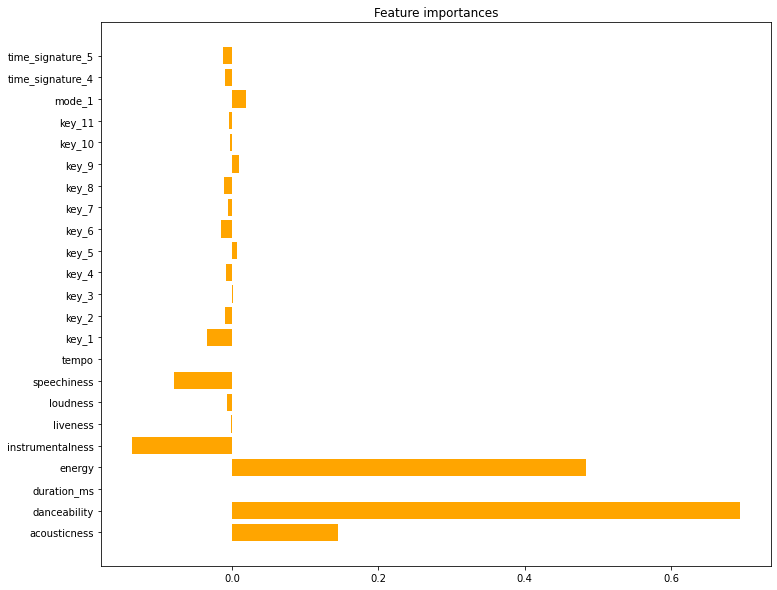

In [92]:
plt.figure(figsize=(12, 10))
plt.title("Feature importances")
plt.barh(importance_lr['features'], importance_lr['coefficients'], color="orange", align="center")
plt.show()

Now with linear regression we can see how our variables increase or decrease the `valence` if we increase our numeric variables by one or if we change different levels for our factors (by keeping everything else unchanged). `Danceability`, `energy` and `acousticness` increase the `valence` greatly after 1 unit of increase as well as some levels of our factor variables `key` and `mode`. All the other variables decrease the `valence` for every 1 unit increase.

### Method 4: Stochastic Gradient Descent

* We will also do one classification method. For this we can split our `valence` variable in 2 categories. The category `0` will be the negative emotions and `1` the positive.

In [93]:
categories = pd.cut(spotify.valence, bins=[0, 0.5, 1], include_lowest = True, labels=[0, 1])
categories

0         0
1         0
2         0
3         1
4         0
         ..
100350    1
100351    0
100352    0
100353    0
100354    0
Name: valence, Length: 100355, dtype: category
Categories (2, int64): [0 < 1]

* Now we will create a copy of the dataframe where each track belongs to one of the two categories

In [94]:
import copy
spotify_stoch = copy.deepcopy(spotify)
spotify_stoch.drop(labels ='valence', axis = 1)
spotify_stoch['valence'] = categories
spotify_stoch

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_4,time_signature_5,valence
0,1jeWrScZZuhw3b55T1fv4O,0.623000,0.261,291160,0.3800,0.000000,0.1050,-9.148,0.0491,74.463,...,0,0,0,0,0,0,1,1,0,0
1,0uYv1tNoIHUt6XPjLME4cA,0.000032,0.397,226000,0.9970,0.002160,0.0255,-4.482,0.0667,97.403,...,0,0,0,0,1,0,1,1,0,0
2,30YV8LO68BIY5fhKbzrENB,0.243000,0.484,194640,0.4070,0.000044,0.1210,-10.029,0.0298,96.134,...,0,0,0,1,0,0,0,1,0,0
3,6p0FS5Vn8oP0yS7VclPs6z,0.045900,0.387,170659,0.8660,0.000000,0.3920,-6.022,0.2620,189.577,...,0,0,0,0,0,1,1,0,0,1
4,4lF8Nolm1dYDTk7Ryn7NSR,0.072500,0.783,193627,0.4660,0.000000,0.1400,-5.269,0.0608,109.939,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100350,4D5Ode2OfZMxIwQyvmhUe8,0.011400,0.791,189846,0.7890,0.000000,0.3010,-4.694,0.1040,112.110,...,0,0,0,0,0,1,0,1,0,1
100351,6NxlMsCFLQYEPOcyqJJqXh,0.341000,0.478,308505,0.7510,0.000000,0.0953,-4.489,0.0464,116.714,...,0,0,0,0,0,0,0,1,0,0
100352,2SuuioSK8HAzWSneSXpvA7,0.740000,0.664,213981,0.2490,0.000000,0.2120,-9.347,0.0326,88.961,...,0,0,0,0,0,0,1,1,0,0
100353,1juPQIH0GuTLGYuvSeDYqd,0.360000,0.639,259457,0.5830,0.001980,0.1060,-8.551,0.0254,115.030,...,0,0,0,0,0,1,0,1,0,0


* For this technique we will only use the numeric variables of our data set and we will also need to scale them:

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(spotify_stoch.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']])
spotify_stoch.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']] = scaler.transform(spotify_stoch.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo']])

In [96]:
spotify_stoch = spotify_stoch.loc[:, ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']]
spotify_stoch

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0.823715,-1.889551,0.229244,-0.814917,-0.487177,-0.527725,0.030682,-0.390001,-1.512139,0
1,-1.044824,-1.107000,-0.113994,1.576715,-0.480035,-0.983418,0.809769,-0.301833,-0.731637,0
2,-0.316062,-0.606397,-0.279187,-0.710259,-0.487033,-0.436013,-0.116420,-0.486685,-0.774813,0
3,-0.907246,-1.164541,-0.405509,1.068930,-0.487177,1.117356,0.552633,0.676529,2.404458,1
4,-0.827462,1.114065,-0.284523,-0.481562,-0.487177,-0.327105,0.678362,-0.331389,-0.305116,0
...,...,...,...,...,...,...,...,...,...,...
100350,-1.010726,1.160097,-0.304439,0.770460,-0.487177,0.595745,0.774371,-0.114977,-0.231251,1
100351,-0.022119,-0.640922,0.320610,0.623163,-0.487177,-0.583325,0.808600,-0.403527,-0.074606,0
100352,1.174646,0.429332,-0.177306,-1.322703,-0.487177,0.085598,-0.002546,-0.472658,-1.018864,0
100353,0.034869,0.285481,0.062244,-0.028043,-0.480631,-0.521993,0.130363,-0.508727,-0.131902,0


In [97]:
from sklearn.model_selection import train_test_split

X4_train, X4_test, y4_train, y4_test = train_test_split(spotify_stoch.iloc[:,0:9], spotify_stoch.valence, 
                                                    test_size=0.20, random_state=111)

In [98]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.001, max_iter=1000, tol=-np.inf, random_state=13, n_jobs=-1)
sgd_clf.fit(X4_train, y4_train) 

SGDClassifier(alpha=0.001, n_jobs=-1, random_state=13, tol=-inf)

In [99]:
sgd_predict = sgd_clf.predict(X4_test)
print(metrics.classification_report(y4_test, sgd_predict))
metrics.accuracy_score(y4_test, sgd_predict)

              precision    recall  f1-score   support

           0       0.75      0.69      0.72     10544
           1       0.69      0.75      0.72      9527

    accuracy                           0.72     20071
   macro avg       0.72      0.72      0.72     20071
weighted avg       0.72      0.72      0.72     20071



0.7186986198993572

In [100]:
metrics.confusion_matrix(y4_test, sgd_predict)

array([[7307, 3237],
       [2409, 7118]])

## Final Valuation using XGBoost

In [149]:
from sklearn.metrics import mean_absolute_error as mae

final_prediction  = xgb_reg.predict(tracks.iloc[:,0:23]) 

print(mae(tracks.valence, final_prediction))

0.15354192800297436


Our final valuation MAE is 0.153541.